In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from sklearn.model_selection import train_test_split

# Generate some toy data
np.random.seed(123)
n_samples = 1000
X = np.random.randn(n_samples, 2)
y = np.sin(X[:, 0]) + np.cos(X[:, 1]) + np.random.randn(n_samples) * 0.1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The above code is making predictions using the posterior predictive distribution. The pm.sample_posterior_predictive method is used to generate posterior predictive samples for the model given the trace of the sampling process. It takes the trace as an input and samples from the posterior predictive distribution for the specified variables.

The ppc['y_hat'].mean(axis=0) is giving the mean prediction for each test data point, The ppc['y_hat'].std(axis=0) gives the standard deviation of the predictions for each test data point.

In [3]:
# Build the model
with pm.Model() as model:
    # Define the prior for the weights and biases
    w0 = pm.Normal('w0', mu=0, sigma=10)
    w1 = pm.Normal('w1', mu=0, sigma=10, shape=X_train.shape[1])
    b = pm.Normal('b', mu=0, sigma=10)
    
    # Define the likelihood
    y_hat = pm.Deterministic('y_hat', w0 + pm.math.dot(X_train, w1) + b)
    y_obs = pm.Normal('y_obs', mu=y_hat, sigma=0.1, observed=y_train)
    
    # Perform MCMC sampling
    trace = pm.sample(2000, chains=2)

C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [b, w1, w0]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 325 seconds.
There were 336 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.509535935060785, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8880295279072681, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [4]:
import sklearn.metrics as metrics
#make predictions with bnn
with model:
    ppc = pm.sample_posterior_predictive(trace,samples=2000,
                                        model=model, var_names=['y_obs'])

C:\Users\Mfund\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


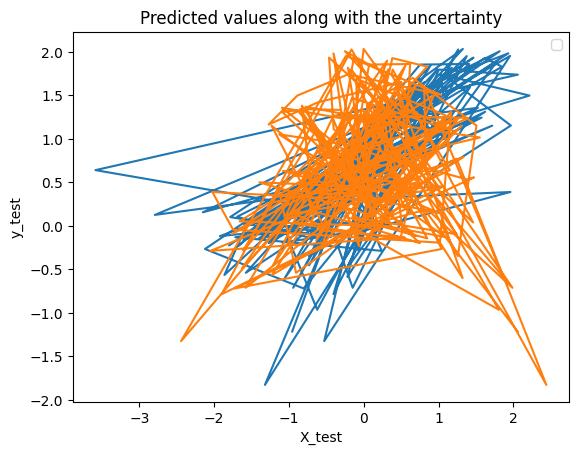

In [5]:
plt.plot(X_test, y_test)
plt.title('Predicted values along with the uncertainty')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [6]:
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, ppc['y_obs'].mean(axis=0)))
print('Mean squared error: ', metrics.mean_squared_error(y_test, ppc['y_obs'].mean(axis=0)))
print('Root mean squared error: ', np.sqrt(metrics.mean_squared_error(y_test, ppc['y_obs'].mean(axis=0))))

ValueError: Found input variables with inconsistent numbers of samples: [200, 800]

C:\Users\Mfund\AppData\Local\Temp\ipykernel_56116\2240762257.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trace['w1'], shade = True)


TypeError: scatter() missing 1 required positional argument: 'y'

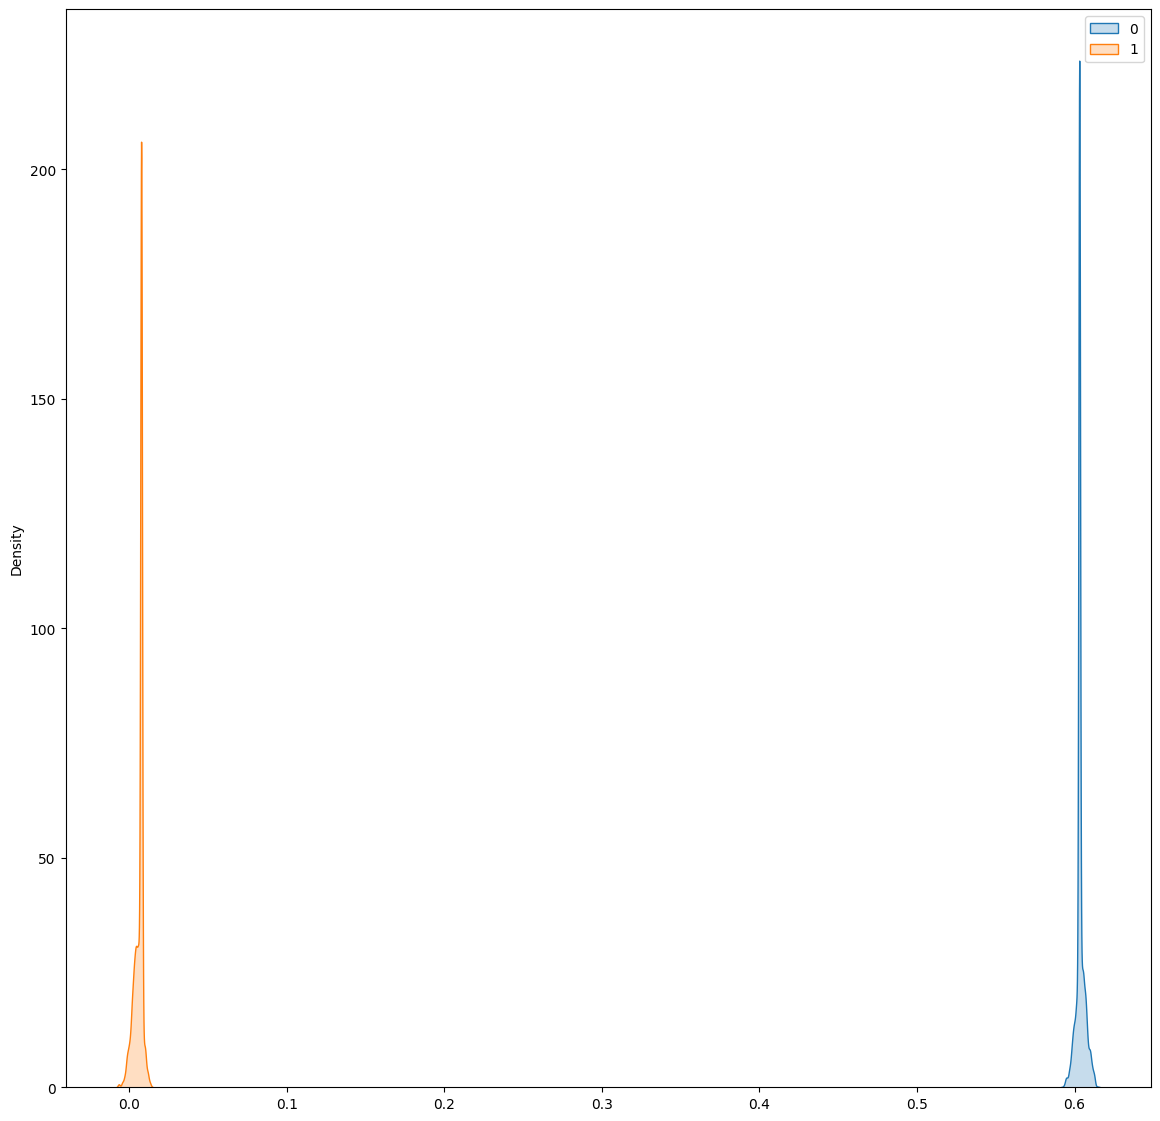

In [9]:
import seaborn as sns
#plot the posterior
plt.figure(figsize=(14, 14))
sns.kdeplot(trace['w1'], shade = True)
plt.scatter(trace['w0'], c = 'red')
plt.title('Posterior Distribution of the Parameters')
plt.xlabel('w1')
plt.ylabel('w0')
plt.show()
 
#plot the samples from the posterior
plt.figure(figsize=(14, 14))
plt.plot(trace['w1'], label = 'w1')
plt.plot(trace['w0'], label = 'w0')
plt.legend()
plt.title('Trace of the Parameters')
plt.show()

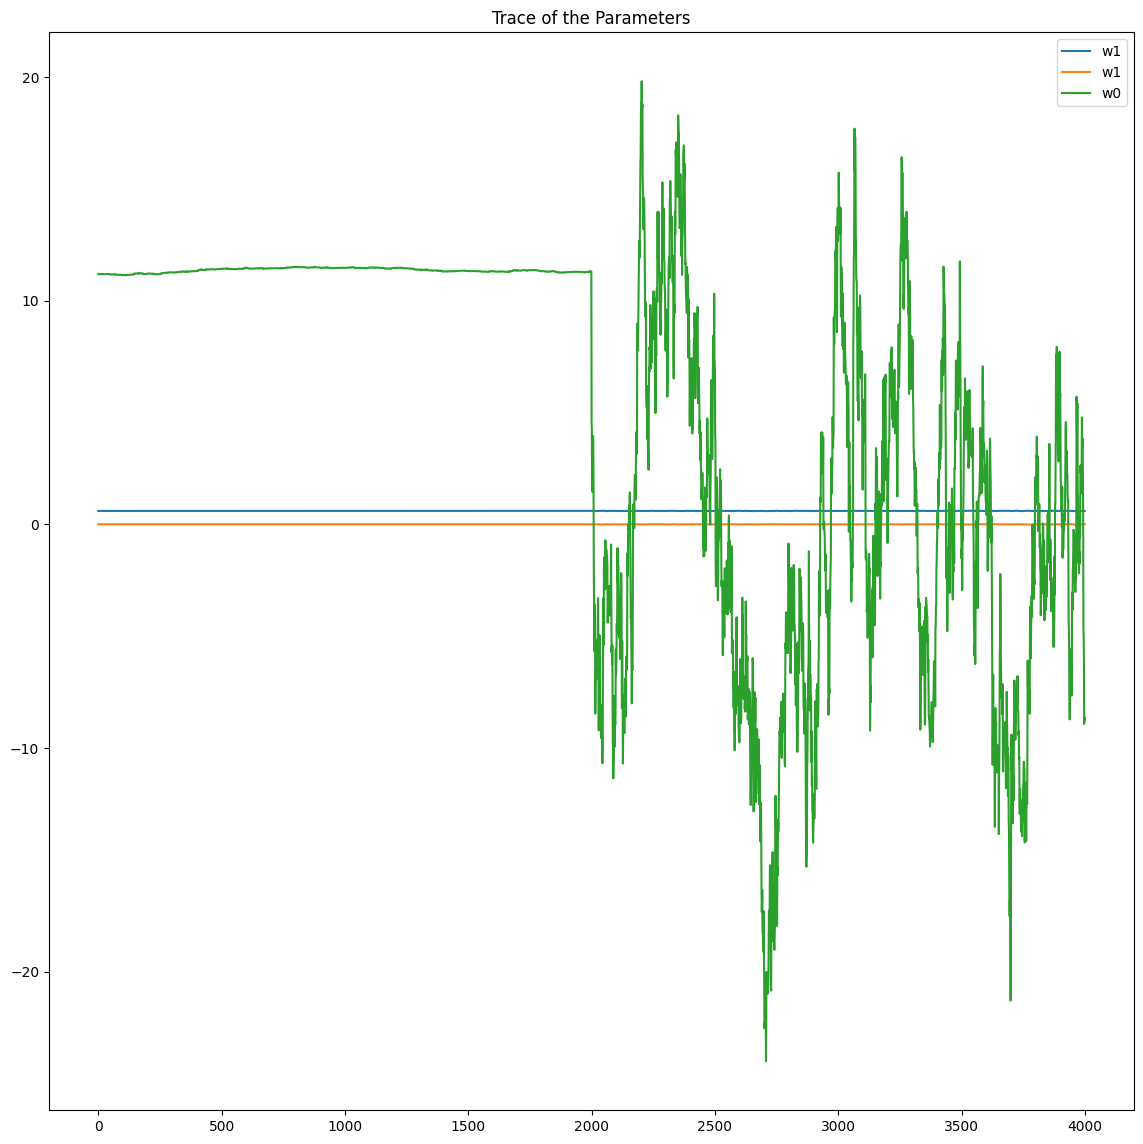

In [10]:
#plot the autocorrelation of the samples
plt.figure(figsize=(14, 14))
plt.plot(trace['w1'], label = 'w1')
plt.plot(trace['w0'], label = 'w0')
plt.legend()
plt.title('Trace of the Parameters')
plt.show()
 

C:\Users\Mfund\AppData\Local\Temp\ipykernel_56116\3732226513.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trace['w1'], label = 'w1')
C:\Users\Mfund\AppData\Local\Temp\ipykernel_56116\3732226513.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trace['w0'], label = 'w0')


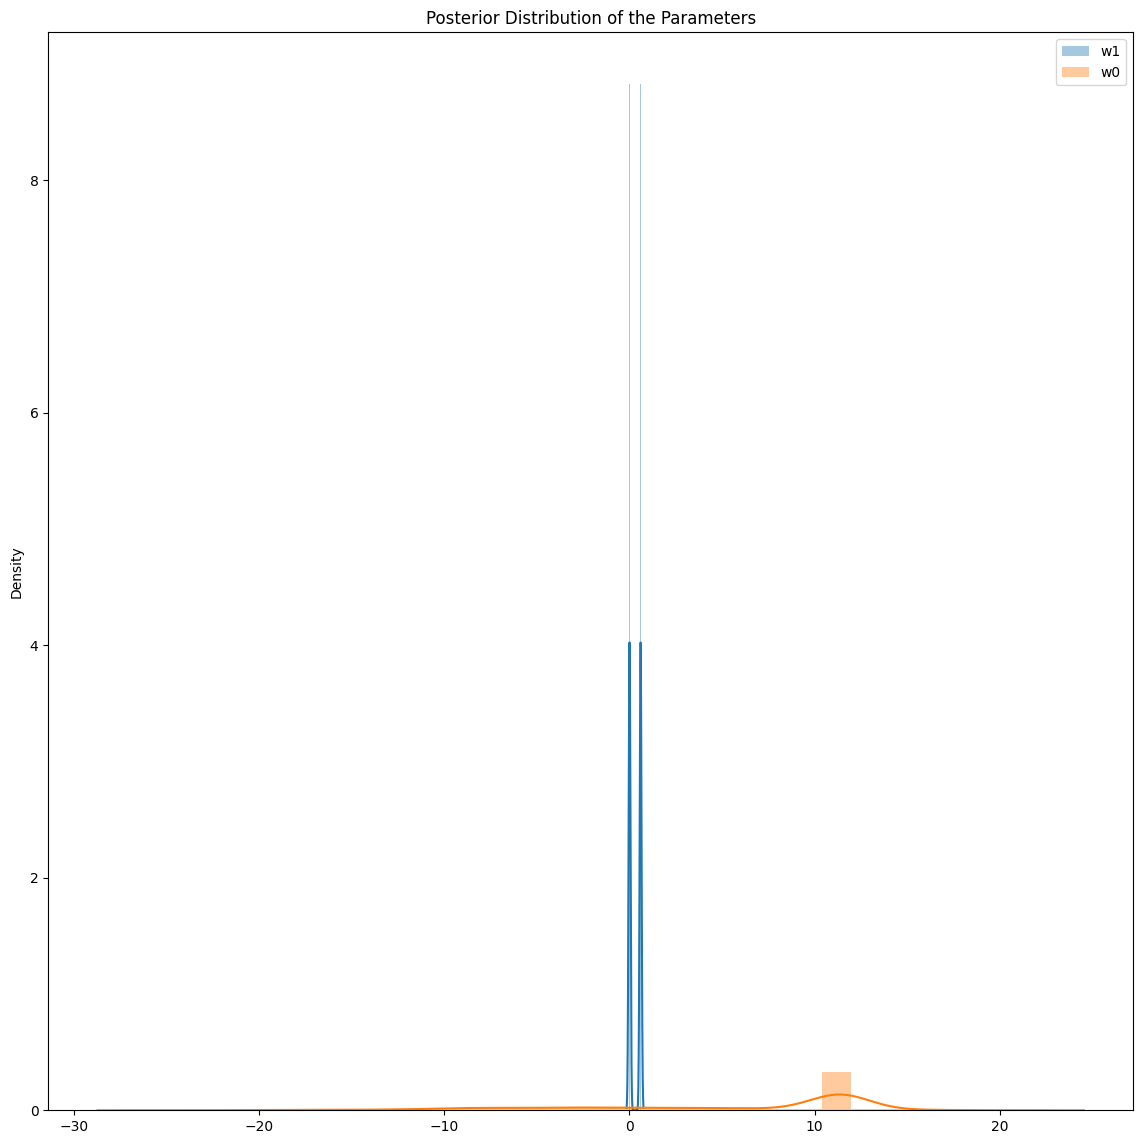

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Mfund\AppData\Roaming\Python\Python38\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
w0          5.335  8.293 -11.046   13.719      4.331    3.346       5.0   
w1[0]       0.603  0.003   0.598    0.610      0.000    0.000     332.0   
w1[1]       0.006  0.003  -0.000    0.010      0.001    0.001       8.0   
b          -4.707  8.293 -13.086   11.674      4.331    3.346       5.0   
y_hat[0]    0.851  0.004   0.843    0.859      0.001    0.001      36.0   
...           ...    ...     ...      ...        ...      ...       ...   
y_hat[795]  0.130  0.005   0.122    0.140      0.000    0.000     638.0   
y_hat[796]  0.205  0.004   0.197    0.214      0.000    0.000     693.0   
y_hat[797]  1.114  0.004   1.105    1.121      0.000    0.000     915.0   
y_hat[798] -0.734  0.007  -0.749   -0.720      0.000    0.000     528.0   
y_hat[799]  0.776  0.004   0.768    0.783      0.001    0.000      42.0   

            ess_tail  r_hat  
w0              51.0   1.81  
w1[0]          101.0   1.84  
w1[1]    


{'w0': array(0.3139622), 'w1': array([0.60368191, 0.00484327]), 'b': array(0.3139622), 'y_hat': array([ 0.85178365,  0.61777218,  0.56336608,  0.03573266,  0.32519267,
       -0.51573392,  0.08863798,  1.52119056,  0.76752679,  0.53919373,
        0.67489104,  1.03374617, -1.67235805,  0.74055332,  0.69991726,
        0.76848806,  0.8158368 ,  0.98278542,  0.72729712,  1.04960321,
        1.43025261,  1.28531399, -0.00332341,  0.02130271,  0.20954618,
        0.18488158, -1.28742765,  1.00111856,  0.48630203,  0.54156465,
       -0.00569673,  0.74811929,  0.50561719,  1.42931741,  0.58391318,
       -0.32376762,  1.46853529,  0.80547249,  0.07938473,  0.50565484,
       -0.01052988,  1.15757319, -0.24690527,  0.04295809,  0.7752703 ,
        1.24696866,  0.6871358 , -1.08779971,  0.7358681 ,  0.25910887,
        0.13881199,  0.38328488,  1.17064876,  0.87129329,  0.92424449,
        1.09951222,  0.50582993,  0.90668711,  0.00549253,  0.17283496,
        0.32891815,  1.26828925, -0.177

In [11]:
#plot the posterior of the parameters
plt.figure(figsize=(14, 14))
sns.distplot(trace['w1'], label = 'w1')
sns.distplot(trace['w0'], label = 'w0')
plt.legend()
plt.title('Posterior Distribution of the Parameters')
plt.show()

#print the summary statistics
print(pm.summary(trace))

#print the map estimate of the parameters
map_estimate = pm.find_MAP(model = model)
print(map_estimate)

In [24]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=model, var_names=['y_obs'])


In [26]:
print(X_test.shape)
print(ppc['y_obs'].mean(axis=0).shape)


(200, 2)
(800,)


In [ ]:
np.resize(ppc['y_obs'].mean(axis=0), (200, 2))


ValueError: x and y must be the same size

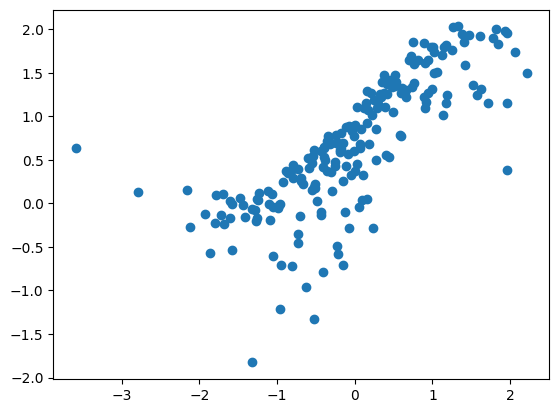

In [31]:
# Plot the predictions along with the uncertainty
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test, label='True')
plt.scatter(X_test[:, 0], ppc['y_obs'].mean(axis=0), label='Predicted')
plt.fill_between(X_test[:, 0], ppc['y_obs'].mean(axis=0) - 2 * ppc['y_obs'].std(axis=0), 
                 ppc['y_obs'].mean(axis=0) + 2 * ppc['y_obs'].std(axis=0), alpha=0.5, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [13]:
import sys
print(sys.version)


3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [16]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Jan 19 2023

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.8.0

matplotlib: 3.6.3
sklearn   : 1.2.0
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
arviz     : 0.14.0
seaborn   : 0.12.2
numpy     : 1.22.1
pymc3     : 3.11.5

Watermark: 2.3.1



In [15]:
!pip install watermark